# CLEAN DATA

In [9]:
import pandas as pd
from IPython.core.display import clear_output
import requests, json
from urllib.request import urlopen
import numpy as np

# Gender API Key
myKey = "etWZXNEMwYYpgNuGhL"

# Clean GAD_data
GAD_data = pd.read_csv('data/data_rev_0.csv', encoding = 'latin-1')
text_columns = ['Employee', 'Charge', 'Labor_Regime', 'Company']
GAD_data[text_columns] = GAD_data[text_columns].apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('latin-1'))
GAD_data[text_columns] = GAD_data[text_columns].apply(lambda value: value.str.lower())
GAD_data[text_columns].drop_duplicates().reset_index(drop=True)

,Employee,Charge,Labor_Regime,Company
0,aguilar carrion genny maria,asistente,losep,asm
1,alvarado garcia jonnathan rodrigo,chofer profesional,losep,asm
2,arevalo ochoa mayra alexandra,terapista,losep,asm
3,astudillo astudillo karen bolivia,asistente,losep,asm
4,avila avila sonia patricia,asistente,losep,asm
5,avila herrera carlos ernesto,guardian residente,codigo de trabajo,asm
6,barros coronel daniel patricio,asistente,losep,asm
7,bermeo portilla david eduardo,asistente,losep,asm
8,coello amaya juan carlos,asistente,losep,asm
9,fajardo chunchi maria teresa,asistente administrativo,losep,asm


# ADD GENDER TO EMPLOYEES

In [13]:
female_names = pd.read_csv('data/female_names.csv', encoding = 'latin-1')
male_names = pd.read_csv('data/male_names.csv', encoding = 'latin-1')

names_dictionary = pd.concat([male_names, female_names], ignore_index=True, axis=1)
names_dictionary = names_dictionary.apply(lambda x: x.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('latin-1'))
names_dictionary = names_dictionary.apply(lambda x: x.astype(str).str.lower())
names_dictionary.columns = ['Male', 'Female']

male = names_dictionary['Male'].dropna(axis=0)
female = names_dictionary['Female'].dropna(axis=0)

m1 = male.str.split().str[0].dropna(axis=0)
m2 = male.str.split().str[1].dropna(axis=0)
m3 = m1.append(m2).drop_duplicates()

f1 = female.str.split().str[0].dropna(axis=0)
f2 = female.str.split().str[1].dropna(axis=0)
f3 = f1.append(f2).drop_duplicates()

m = m3.to_frame().reset_index(drop=True)
f = f3.to_frame().reset_index(drop=True)

names_dictionary = pd.concat([m,f], ignore_index=True, axis=1).reset_index(drop=True)
names_dictionary.columns = ['Male', 'Female']
names_dictionary

,Male,Female
0,anaterve,carmen
1,aadel,maria
2,aadil,aliyah
3,aali,aaltje
4,aamar,aase
5,aamer,aatika
6,aamir,aaya
7,aaron,abarne
8,ababacar,abby
9,abad,abdona


In [14]:
# Obtain gender for all employess in GAD_data
GAD_data['Gender'] = ""

for i, name in enumerate(GAD_data['Employee']):
    
    if len(name.split()) > 2:
        Name = name.split()[2]
    if len(name.split()) < 3:
        Name = name.split()[1]

    flag = names_dictionary.apply(lambda row: row.astype(str).str.contains(r'(?:\s|^)'+Name+'(?:\s|$)').any(), axis=0)
    if flag[0]:
        GAD_data['Gender'].loc[i] = 'male'
        print(name, '\tmale')
        clear_output(wait = True)
    elif flag[1]:
        GAD_data['Gender'].loc[i] = 'female'
        print(name, '\tfemale')
        clear_output(wait = True)
    elif (flag[0] & flag[1]) == True or (flag[0] & flag[1]) == False:
        url = "https://gender-api.com/get?key=" + myKey + "&name="+Name
        response = urlopen(url)
        decoded = response.read().decode('utf-8')
        data = json.loads(decoded)
        res = data["gender"]  
        print(name, res, type(res))
        clear_output(wait = True)
        if res != 'unknown':
            GAD_data['Gender'].loc[i] = res
            print(name, res, 'Gender API')
            clear_output(wait = True)
        else:        
            GAD_data['Gender'].loc[i] = ''
            print(name, '\tNaN')
            clear_output(wait = True)

zuniga leon flavio oswaldo 	male


In [15]:
# Print missing gender for employees names
missing = GAD_data[(GAD_data['Gender'])==''].values.tolist()
print(missing)

[['guarango cortez wazhinton edmidio', 'operador de maquinaria', 'codigo de trabajo', 0, 681.2, 181.65, 'emac', ''], ['brito montero shofre eduardo', 'agente_civil control de transporte y transito', 'loep', 4, 990.0, 113.75, 'emov', ''], ['salvatierra moran gumerciando isaias', 'conserje', 'codigo de trabajo', 0, 484.59, 183.19, 'emurplag', ''], ['nieves dario ariolfo', 'albanil', 'codigo de trabajo', 2, 1095.0, 131.32, 'etapa', ''], ['ramon jose eliverio', 'ayudante tecnico', 'codigo de trabajo', 3, 1074.0, 129.54, 'etapa', ''], ['procel procel jahsmina elizabeth', 'analista', 'losep', 3, 1185.43, 130.04, 'gad', ''], ['villagomez reino halderz humberto', 'cadenero 2', 'codigo del trabajo', 4, 1000.43, 448.78, 'gad', '']]


In [16]:
# Obtain gender for missing employees names and save data set with gender column
names_dictionary_add = {'wazhinton' : 'male',
                        'shofre' : 'male',
                        'gumerciando': 'male',
                        'ariolfo' : 'male',
                        'eliverio' : 'male',
                        'jahsmina' : 'female',
                        'halderz' : 'male'
                        }

ind = GAD_data[(GAD_data['Gender'])==''].index.tolist()

for i in ind:
    name  = GAD_data['Employee'].values[i]
    Name = name.split()[2]
    response = names_dictionary_add[Name]
    GAD_data['Gender'].loc[i] = response
    
GAD_data.to_csv("data/GAD_data.csv")

/home/luis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# DATA ANALYSIS

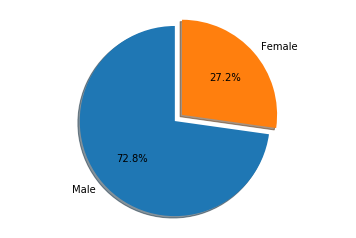

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import clear_output
import numpy as np

GAD_data2 = pd.read_csv('data/GAD_data.csv', encoding = 'latin-1')

num_emp = {}
num_emp  = GAD_data2['Gender'].astype('str').value_counts()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male', 'Female'
sizes = num_emp.values
explode = (0, 0.1)  # only "explode" the 1srt slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# MACHINE LEARNING: PREPARING DATA

In [2]:
#Change company name for level using like base the salary

GAD_data2['Salary'].astype('float64')

salary_by_company = GAD_data2.pivot_table(index="Company", values="Salary", aggfunc=np.mean)
salary_by_company.sort_values('Salary', inplace=True, ascending=False)
salary_by_company

,Salary
Company,
emuvi,1503.703704
fb,1492.864348
ccpd,1411.014167
fbienal,1190.465000
etapa,1189.706609
edec,1146.155172
gad,1132.342622
ft,1111.677143
csc,1097.088750


In [3]:
#Change company name for level using like base the salary
company_level = {'emuvi':15,'fb':14,'etapa':13,'ccpd':12,'fbienal':11,
           'edec':10,'gad':9,'ft':8,'csc':7,'rp':6,'emov':5,
           'emac':4,'asm':3,'emurplag':2,'gc':1}

for i, name in enumerate(GAD_data2['Company']):
    GAD_data2['Company'].loc[i] = company_level[name]
    print(name, i)
    clear_output(wait = True)

GAD_data2['Company']

0       3
1       3
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      3
21      3
22      3
23      3
24      3
25      3
26      3
27      3
28      3
29      3
       ..
4294    9
4295    9
4296    9
4297    9
4298    9
4299    9
4300    9
4301    9
4302    9
4303    9
4304    9
4305    9
4306    9
4307    9
4308    9
4309    9
4310    9
4311    9
4312    9
4313    9
4314    9
4315    9
4316    9
4317    9
4318    9
4319    9
4320    9
4321    9
4322    9
4323    9
Name: Company, Length: 4324, dtype: object

In [4]:
# Read first word of employee office
employee_office = []

for i, name in enumerate(GAD_data2['Charge']): 
    employee_office.append(name.split()[0])

GAD_data2['Charge'] = employee_office

salary_by_charge = GAD_data2.pivot_table(index="Charge", values="Salary", aggfunc=np.mean)
salary_by_charge.sort_values('Salary', inplace=True, ascending=False)
salary_by_charge

,Salary
Charge,
alcalde,5009.000000
comandante,3798.000000
registradora,3798.000000
procurador,3798.000000
gerente,3462.353333
director,3123.176905
subgerente,2931.333333
subcomandante,2588.000000
concejal,2504.500000


In [5]:
#Change charge name for level using like base the salary
charges_levels = {}
charges = salary_by_charge.index.tolist()
levels = range(len(charges), 0, -1)

for i, name in enumerate(charges):
    charges_levels[name] = levels[i]
charges_levels

{'abogado': 77,
 'administrador': 87,
 'agente_civil': 44,
 'albanil': 24,
 'alcalde': 99,
 'analista': 63,
 'arquitecto': 74,
 'asesor': 82,
 'asistente': 32,
 'aspirante_guardia': 7,
 'auditor': 86,
 'auxiliar': 20,
 'ayudante': 41,
 'bibliotecario': 43,
 'bodeguero': 62,
 'cadenero': 33,
 'carpintero': 22,
 'chofer': 28,
 'cocinera': 13,
 'cocinero': 8,
 'comandante': 98,
 'comunicador': 68,
 'concejal': 91,
 'conserje': 14,
 'contador': 67,
 'coordinador': 90,
 'dibujante': 47,
 'digitalizador': 17,
 'director': 94,
 'disenador': 50,
 'economista': 80,
 'educador': 56,
 'ejecutivo': 12,
 'ejecutivo_ventas': 30,
 'electricista': 6,
 'enfermera': 55,
 'especialista': 61,
 'experto': 83,
 'fiscalizador': 26,
 'fotografo': 49,
 'geofonador': 57,
 'gerente': 95,
 'guardalmacen': 71,
 'guardaparque': 34,
 'guardia': 9,
 'guardian': 27,
 'guia': 18,
 'ingeniero': 81,
 'inspector': 40,
 'jefe': 88,
 'juez': 84,
 'laboratorista': 19,
 'lector_de_medidores': 2,
 'lubricador_lavador': 31,
 'm

In [6]:
for i, name in enumerate(GAD_data2['Charge']):
    GAD_data2['Charge'].loc[i] = charges_levels[name]
    print(name, i)
    clear_output(wait = True)

GAD_data2['Charge']

0       32
1       28
2       54
3       32
4       32
5       27
6       32
7       32
8       32
9       32
10      32
11      32
12      32
13      32
14      76
15      63
16      20
17      27
18      32
19      32
20      59
21      32
22      32
23      32
24      32
25      54
26      28
27      15
28      77
29      66
        ..
4294    40
4295    94
4296    20
4297    32
4298    74
4299    81
4300    63
4301    35
4302    63
4303    40
4304    74
4305    91
4306    28
4307    66
4308    43
4309    77
4310    24
4311    37
4312    88
4313    63
4314    74
4315    63
4316    32
4317    14
4318    81
4319    32
4320    25
4321    20
4322    32
4323    33
Name: Charge, Length: 4324, dtype: object

In [7]:
for i, name in enumerate(GAD_data2['Gender']):
    if name == 'male':
        GAD_data2['Gender'].loc[i] = 0
    else:
        GAD_data2['Gender'].loc[i] = 1
    print(i)

/home/luis/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
text_columns = ['Employee', 'Gender', 'Charge', 'Company','Salary', 'Scale']
GAD_data3 = GAD_data2[text_columns].drop_duplicates().reset_index(drop=True)

GAD_data3[['Gender', 'Charge', 'Company']] = GAD_data3[['Gender', 'Charge', 'Company']].astype('int64')
GAD_data3

,Employee,Gender,Charge,Company,Salary,Scale
0,aguilar carrion genny maria,1,32,3,675.00,2
1,alvarado garcia jonnathan rodrigo,0,28,3,543.00,1
2,arevalo ochoa mayra alexandra,1,54,3,1185.43,3
3,astudillo astudillo karen bolivia,1,32,3,675.00,2
4,avila avila sonia patricia,1,32,3,675.00,2
5,avila herrera carlos ernesto,0,27,3,600.00,1
6,barros coronel daniel patricio,0,32,3,675.00,2
7,bermeo portilla david eduardo,0,32,3,675.00,2
8,coello amaya juan carlos,0,32,3,675.00,2
9,fajardo chunchi maria teresa,1,32,3,790.85,2


In [9]:
GAD_data3.info()
GAD_data3.to_csv("data/GAD_data_ML.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
Employee    4324 non-null object
Gender      4324 non-null int64
Charge      4324 non-null int64
Company     4324 non-null int64
Salary      4324 non-null float64
Scale       4324 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 202.8+ KB


# MACHINE LEARNING: SALARY PREDICTION

In [122]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_predict

dc_listings = pd.read_csv('data/GAD_data_ML.csv')
k = 10

avg_rmse = []
std_rmse = []
folds = []

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for i in range(1,k+1,1):
    for fold in num_folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors=i, algorithm='brute')
        mses = cross_val_score(model, dc_listings[['Company', 'Charge', 'Scale', 'Gender']],
                               dc_listings['Salary'], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse.append(np.sqrt(np.mean(rmses)))
        std_rmse.append(np.std(rmses))
        folds.append(fold)
        if fold == 5:
            print("k=",i, "folds=", str(fold), "avg_RMSE=", str(np.mean(rmses)))

k= 1 folds= 5 avg_RMSE= 190.148779169
k= 2 folds= 5 avg_RMSE= 178.783680012
k= 3 folds= 5 avg_RMSE= 174.061426745
k= 4 folds= 5 avg_RMSE= 174.73631536
k= 5 folds= 5 avg_RMSE= 171.313130553
k= 6 folds= 5 avg_RMSE= 171.513573408
k= 7 folds= 5 avg_RMSE= 173.822323475
k= 8 folds= 5 avg_RMSE= 173.335948995
k= 9 folds= 5 avg_RMSE= 174.411158225
k= 10 folds= 5 avg_RMSE= 175.457966393


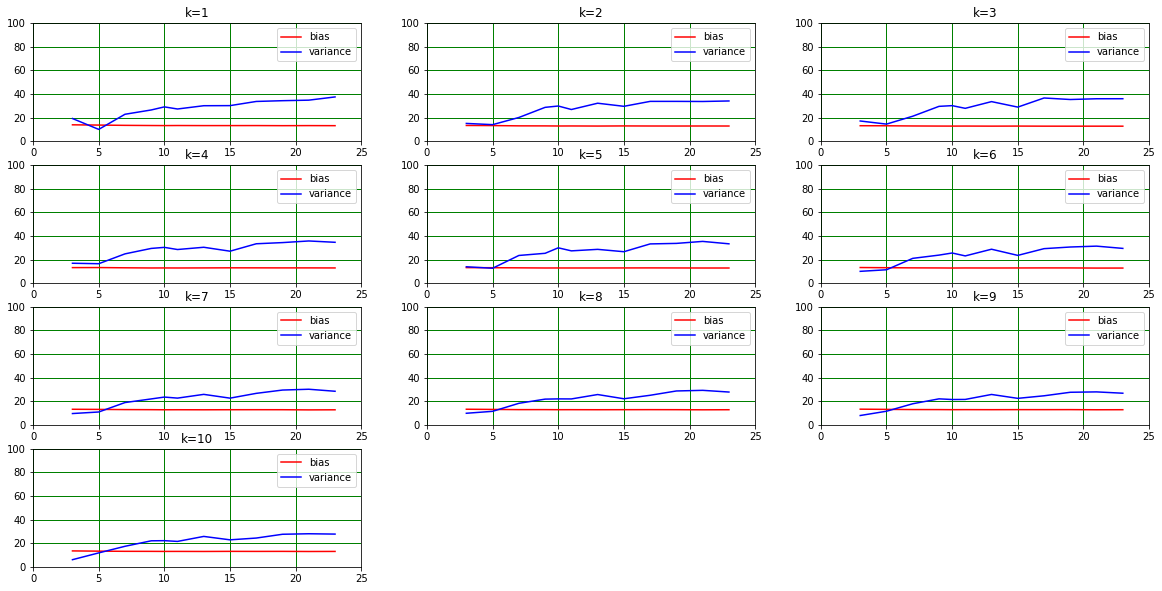

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Last mission
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,10))

results = pd.DataFrame(
    {'avg_rmse': avg_rmse,
     'std_rmse': std_rmse,
     'folds': folds
    })

f = 12

for i, w in zip (range(0,k), range(f,f*(k+1),f)): 
    ax=results.iloc[i*12:w].plot(kind='line', x='folds', y=['avg_rmse','std_rmse'], title="k="+str(i+1),color=['red','blue'], legend=False,
                ax=axes[i//3, i%3])
    ax.set_xlim(0,25)
    ax.set_ylim(0,100)
    ax.xaxis.label.set_visible(False)
    ax.legend(loc='best',labels=['bias','variance'])
    # idx = np.argwhere(np.diff(np.sign(ax.lines[0].get_ydata() - ax.lines[1].get_ydata())) != 0).reshape(-1) + 0
    ax.grid(color='g', linestyle='-', linewidth=1)
    # print(idx)
    # ax.plot(ax.lines[0].get_xdata()[idx], ax.lines[0].get_ydata()[idx], 'ro')

fig.delaxes(axes[3][1])
fig.delaxes(axes[3][2])
fig.savefig('final.png')
plt.show()

# TESTS

In [124]:
from sklearn import metrics
k = 5
f = KFold(5, shuffle=True, random_state=1)

model = KNeighborsRegressor(n_neighbors=k, algorithm='auto')
dc_listings['Predicted_Salary'] = cross_val_predict(model, dc_listings[['Company', 'Charge', 'Scale', 'Gender']], dc_listings['Salary'], cv=f)
RMSE = np.sqrt(mean_squared_error(dc_listings['Salary'], dc_listings['Predicted_Salary']))
RMSE

171.08437457119032

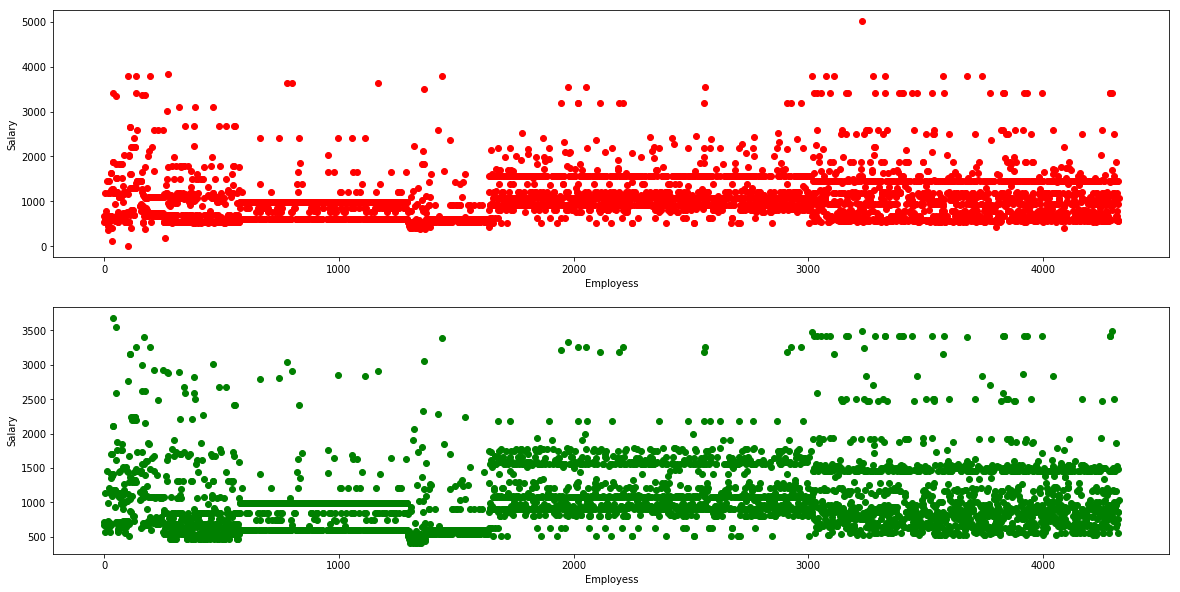

In [125]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(dc_listings['Unnamed: 0'], dc_listings['Salary'], color='red')
ax1.set_xlabel('Employess')
ax1.set_ylabel('Salary')
ax2.scatter(dc_listings['Unnamed: 0'], dc_listings['Predicted_Salary'], color='green')
ax2.set_xlabel('Employess')
ax2.set_ylabel('Salary')
plt.show()
fig.savefig('employess.png')

In [126]:
dc_listings

,Unnamed: 0,Employee,Gender,Charge,Company,Salary,Scale,Predicted_Salary
0,0,aguilar carrion genny maria,1,32,3,675.00,2,675.000
1,1,alvarado garcia jonnathan rodrigo,0,28,3,543.00,1,719.616
2,2,arevalo ochoa mayra alexandra,1,54,3,1185.43,3,1137.334
3,3,astudillo astudillo karen bolivia,1,32,3,675.00,2,669.370
4,4,avila avila sonia patricia,1,32,3,675.00,2,669.370
5,5,avila herrera carlos ernesto,0,27,3,600.00,1,570.050
6,6,barros coronel daniel patricio,0,32,3,675.00,2,675.000
7,7,bermeo portilla david eduardo,0,32,3,675.00,2,675.000
8,8,coello amaya juan carlos,0,32,3,675.00,2,675.000
9,9,fajardo chunchi maria teresa,1,32,3,790.85,2,675.000


In [147]:
features = ['Company', 'Charge', 'Scale']
test =    [[    4  ,       95,       4]]
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')

knn.fit(dc_listings[features], dc_listings['Salary'])

prediction = knn.predict(test)
print("Predicted Salary:",prediction)

Predicted Salary: [ 3332.44]
